In [1]:
import numpy as np
import tensorflow as tf
from random import shuffle, seed, random
from tqdm import tqdm
import cv2
from os import makedirs, listdir, path

from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
from shutil import copyfile

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

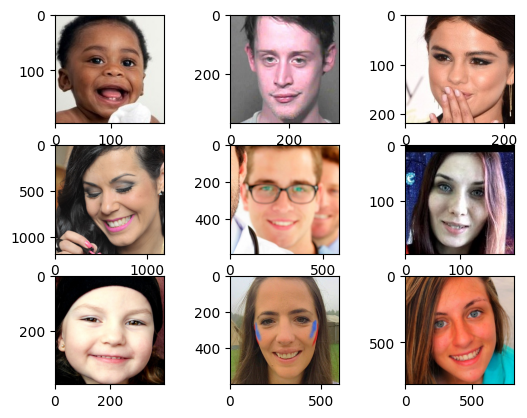

In [3]:
folder = "dataset"
subfolders = ["Angry", "Happy", "Neutral", "Sad", "Surprised"]
image_files = []

chosen_emotion = "Happy"

for filename in listdir(path.join(folder, f"{chosen_emotion}/")):
  name = filename.split("~")[-1]
  if (name == f"{chosen_emotion.lower()}.jpg" or name == f"{chosen_emotion.lower()}.png"):
    image_files.append(path.join(folder, chosen_emotion, filename))

image_files = sorted(image_files)

for i in range(9):
  plt.subplot(3, 3, i + 1)
  if i < len(image_files):
    image = imread(image_files[i])
    plt.imshow(image)

plt.show()

In [4]:
dataset_home = "dataset_emotions"
subdirs = ["train/", "test/"]
labeldirs = ["Angry/", "Happy/", "Neutral/", "Sad/", "Surprise/"]

for subdir in subdirs:
  for labeldir in labeldirs:
    newdir = path.join(dataset_home, subdir, labeldir)
    makedirs(newdir, exist_ok=True)

seed(1)

val_ratio = 0.25

src_directory = "dataset/"

for labeldir in labeldirs:
    label = labeldir.strip('/')
    label_src_directory = path.join(src_directory, labeldir)
    for file in listdir(label_src_directory):
        src = path.join(label_src_directory, file)
        dst_dir = "train/" if random() >= val_ratio else "test/"
        dst = path.join(dataset_home, dst_dir, labeldir, file)
        copyfile(src, dst)


In [7]:
import os

dataset_folder = "dataset"
subdirs = ["Angry", "Happy", "Neutral", "Sad", "Surprise"]
extensions = [".png", ".jpg"]

for subdir in subdirs:
    subdir_path = os.path.join(dataset_folder, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        for extension in extensions:
            if filename.endswith(extension) and not filename.endswith(f"~{subdir.lower()}{extension}"):
                base_name = filename.rsplit('.', 1)[0]
                new_filename = f"{base_name}~{subdir.lower()}{extension}"
                new_file_path = os.path.join(subdir_path, new_filename)
                os.rename(file_path, new_file_path)
                break

In [8]:
def define_model():
  model = VGG16(include_top=False, input_shape=(224, 224, 3))

  for layer in model.layers:
    layer.trainable = False

  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(5, activation='softmax')(class1)

  model = Model(inputs=model.inputs, outputs=output)

  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

def run_test_harness():
  model = define_model()

  datagen = ImageDataGenerator(featurewise_center=True)

  datagen.mean = [123.68, 116.779, 103.939]

  train_it = datagen.flow_from_directory(
    'dataset_emotions/train/', 
    class_mode='categorical', 
    batch_size=128, 
    target_size=(224, 224)
  )

  test_it = datagen.flow_from_directory(
    'dataset_emotions/test/', 
    class_mode='categorical', 
    batch_size=128, 
    target_size=(224, 224)
  )

  model.fit(
    train_it, 
    validation_data=test_it, 
    steps_per_epoch=len(train_it), 
    validation_steps=len(test_it), 
    epochs=10, 
    verbose=1
  )

  model.save('final_model_emotions.keras')

run_test_harness()

Found 10632 images belonging to 5 classes.
Found 3616 images belonging to 5 classes.
Epoch 1/10


c:\Users\Adrian Danao\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_22']. Received: the structure of inputs=*
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 301s 4s/step - accuracy: 0.2970 - loss: 5.8239 - val_accuracy: 0.4541 - val_loss: 1.2161
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


c:\Users\Adrian Danao\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


84/84 ━━━━━━━━━━━━━━━━━━━━ 296s 4s/step - accuracy: 0.4884 - loss: 1.1144 - val_accuracy: 0.5567 - val_loss: 1.0725
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 116us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.5815 - loss: 0.9549 - val_accuracy: 0.5611 - val_loss: 1.1266
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 107us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 284s 3s/step - accuracy: 0.6532 - loss: 0.8278 - val_accuracy: 0.5774 - val_loss: 1.1496
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 119us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.7119 - loss: 0.6833 - val_accuracy: 0.6134 - val_loss: 1.0514
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 113us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [10]:
dataset_home = "finalized_emotions"
labeldirs = ["Angry/", "Happy/", "Neutral/", "Sad/", "Surprise/"]

for labeldir in labeldirs:
  newdir = path.join(dataset_home, labeldir)
  makedirs(newdir, exist_ok=True)

src_directory = "dataset_emotions/test/"

for labeldir in labeldirs:
  src_subdir = path.join(src_directory, labeldir)
  for file in listdir(src_subdir):
    src = path.join(src_subdir, file)

    if path.isfile(src):
      dst = path.join(dataset_home, labeldir, file)
      copyfile(src, dst)

In [20]:
def load_image(filename):
  img = load_img(filename, target_size=(224, 224))
  img = img_to_array(img)
  img = img.reshape(1, 224, 224, 3)
  img = img.astype('float32')
  img = img - [123.68, 116.779, 103.939]
  return img

def run_example(filename):
    img = load_image(filename)
    model = load_model('final_model_emotions.keras')
    result = model.predict(img)
    
    categories = ["Angry", "Happy", "Neutral", "Sad", "Surprised"]
    predicted_class = np.argmax(result[0])
    predicted_label = categories[predicted_class]
    predicted_percentage = result[0][predicted_class] * 100
    
    print(f"Predicted category: {predicted_label} ({predicted_percentage:.2f}%)")

run_example('finalized_emotions/Sad/0a9f7f99c24f844d7793e2acf0a40a93992a64411144a1452d035284~sad.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted category: Sad (69.49%)
